In [1]:
import smplx
model_path = "/home/ldy/ldy/smplx_openpose/wiki/assets/SMPLX_OpenPose_mapping/models"
model = smplx.create(model_path=model_path,model_type='smplx')
import json
json_dir = "./smplx_openpose25.json"
with open(json_dir) as f:
    mf = json.load(f)

smpl_mesh = model(return_verts=True)




ValueError: Unknown model type models, exiting!

In [224]:
mapping = mf['smplx_idxs'][:14]
with open("./openpose18_result.json") as f:
    mapping = json.load(f)


In [225]:
mapping

[55, 12, 17, 19, 21, 16, 18, 20, 2, 5, 8, 1, 4, 7, 56, 57, 58, 59]

In [226]:
joints = smpl_mesh.joints.squeeze()
# joints = joints[:,:25].squeeze(0)
print(joints.shape)
openpose_joints = joints[mapping]
# openpose_joints = joints[:18]
openpose_joints.shape





torch.Size([127, 3])


torch.Size([18, 3])

In [227]:
# import numpy as np
# from plyfile import PlyData,PlyElement
# def write_ply(save_path,points,text=True):
#     """
#     save_path : path to save: '/yy/XX.ply'
#     pt: point_cloud: size (N,3)
#     """
#     points = [(points[i,0], points[i,1], points[i,2]) for i in range(points.shape[0])]
#     vertex = np.array(points, dtype=[('x', 'f4'), ('y', 'f4'),('z', 'f4')])
#     el = PlyElement.describe(vertex, 'vertex', comments=['vertices'])
#     PlyData([el], text=text).write(save_path)


In [228]:
# write_ply('./openpose25.ply',openpose_joints.detach().cpu().numpy(),text=False)

In [229]:

# from PIL import Image
# res = 512
# max_range = openpoes_xy.abs().max().item()*2
# img = Image.new('RGB', (res, res), (0, 0, 0))
# for xy in openpoes_xy:
#     x = int(xy[0]/max_range*res)
#     y = int(xy[1]/max_range*res)
#     print(x, y)
#     img.putpixel((x, y), (255, 0, 0))
# img

In [230]:
# import torch
# #look from front
# cam_pose = torch.eye(4)
# cam_pose[0,0] = -1
# cam_pose[1,1] = -1
# cam_pose[2,2] = -1
# cam_pose[0,3] = 0
# cam_pose[1,3] = 0
# cam_pose[2,3] = 2
# #use cam_pose render openpose_joint to img




In [231]:
# import pyrender
# import trimesh
# import numpy as np
# import matplotlib.pyplot as plt
# mesh = trimesh.load("./openpose25.ply")
# scene = pyrender.Scene()
# scene.add(mesh)
# camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
# s = np.sqrt(2)/2
# camera_pose = np.array([
#     [0.0, -s,   s,   0.3],
#     [1.0,  0.0, 0.0, 0.0],
#     [0.0,  s,   s,   0.35],
#     [0.0,  0.0, 0.0, 1.0],
#  ])
# scene.add(camera, pose=camera_pose)
# light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
#                             innerConeAngle=np.pi/16.0,
#                             outerConeAngle=np.pi/6.0)
# scene.add(light, pose=camera_pose)
# r = pyrender.OffscreenRenderer(400, 400)
# color, depth = r.render(scene)

In [232]:
# from controlnet_aux import OpenposeDetector
# open_pose = OpenposeDetector.from_pretrained("lllyasviel/Annotators")


In [233]:
# from PIL import Image
# import os
# os.environ['HTTPS_PROXY'] = 'http://shadowhome.top:7890'
# os.environ['HTTP_PROXY'] = 'http://shadowhome.top:7890'
# import requests
# from io import BytesIO
# # load image
# url = "https://huggingface.co/lllyasviel/sd-controlnet-openpose/resolve/main/images/pose.png"

# response = requests.get(url)
# img = Image.open(BytesIO(response.content)).convert("RGB").resize((512, 512))

In [234]:
# img
# processed_image_open_pose = open_pose(img)
# processed_image_open_pose
# img.save("pose.png")

In [235]:

import numpy as np
def project(points):
    

    # 三维点
    # point_3d = np.array([1,1,1])

    # 相机外参（旋转矩阵 R 和平移向量 T）
    R = np.eye(3)

    T = np.array([0,0,-3])

    # 相机内参
    fx = 1000  # 焦距 x
    fy = 1000  # 焦距 y
    cx = fx/2  # 主点 x
    cy = fy/2   # 主点 y
    projected_points = []
    # 投影计算
    for point in points:
        point_3d_homogeneous = point

        point_camera = R @ point_3d_homogeneous + T
        u = (fx * point_camera[0] / point_camera[2]) + cx
        v = (fy * point_camera[1] / point_camera[2]) + cy
        projected_points.append([u,v])
    return np.array(projected_points)



In [236]:
import math
import cv2
def draw_bodypose(canvas: np.ndarray, keypoints) -> np.ndarray:
    """
    Draw keypoints and limbs representing body pose on a given canvas.

    Args:
        canvas (np.ndarray): A 3D numpy array representing the canvas (image) on which to draw the body pose.
        keypoints (List[Keypoint]): A list of Keypoint objects representing the body keypoints to be drawn.

    Returns:
        np.ndarray: A 3D numpy array representing the modified canvas with the drawn body pose.

    Note:
        The function expects the x and y coordinates of the keypoints to be normalized between 0 and 1.
    """
    H, W, C = canvas.shape
    stickwidth = 4

    limbSeq = [
        [2, 3], [2, 6], [3, 4], [4, 5], 
        [6, 7], [7, 8], [2, 9], [9, 10], 
        [10, 11], [2, 12], [12, 13], [13, 14], 
        [2, 1], [1, 15], [15, 17], [1, 16], 
        [16, 18],
    ]

    colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
              [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
              [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

    for (k1_index, k2_index), color in zip(limbSeq, colors):
        if k1_index-1 >= len(keypoints) or k2_index -1>= len(keypoints):
            continue
        keypoint1 = keypoints[k1_index - 1]
        keypoint2 = keypoints[k2_index - 1]

        if keypoint1 is None or keypoint2 is None:
            continue

        Y = np.array([keypoint1[0], keypoint2[0]]) * float(W)
        X = np.array([keypoint1[1], keypoint2[1]]) * float(H)
        mX = np.mean(X)
        mY = np.mean(Y)
        length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
        angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
        polygon = cv2.ellipse2Poly((int(mY), int(mX)), (int(length / 2), stickwidth), int(angle), 0, 360, 1)
        cv2.fillConvexPoly(canvas, polygon, [int(float(c) * 0.6) for c in color])

    for keypoint, color in zip(keypoints, colors):
        if keypoint is None:
            continue

        x, y = keypoint
        x = int(x * W)
        y = int(y * H)
        cv2.circle(canvas, (int(x), int(y)), 4, color, thickness=-1)

    return canvas

In [237]:
def draw_poses(poses, H, W, draw_body=True, draw_hand=True, draw_face=True):
    """
    Draw the detected poses on an empty canvas.

    Args:
        poses (List[PoseResult]): A list of PoseResult objects containing the detected poses.
        H (int): The height of the canvas.
        W (int): The width of the canvas.
        draw_body (bool, optional): Whether to draw body keypoints. Defaults to True.
        draw_hand (bool, optional): Whether to draw hand keypoints. Defaults to True.
        draw_face (bool, optional): Whether to draw face keypoints. Defaults to True.

    Returns:
        numpy.ndarray: A 3D numpy array representing the canvas with the drawn poses.
    """
    canvas = np.zeros(shape=(H, W, 3), dtype=np.uint8)

    # for pose in poses:
    pose = poses
    if draw_body:
            canvas = draw_bodypose(canvas, pose)

        # if draw_hand:
        #     canvas = draw_handpose(canvas, pose.left_hand)
        #     canvas = draw_handpose(canvas, pose.right_hand)

        # if draw_face:
        #     canvas = draw_facepose(canvas, pose.face)

    return canvas

(18, 3)
[[0.49999972 0.40444185]
 [0.50452496 0.46438027]
 [0.55027746 0.47335844]
 [0.63887018 0.48557196]
 [0.71960997 0.48712496]
 [0.44559206 0.47173402]
 [0.36325227 0.49571882]
 [0.28103258 0.48813534]
 [0.51998669 0.65130712]
 [0.53448542 0.77021988]
 [0.52919588 0.90326022]
 [0.47965714 0.64737099]
 [0.46162942 0.77218862]
 [0.47625236 0.90127296]
 [0.51128947 0.39356582]
 [0.48817646 0.39358768]
 [0.52366251 0.40820012]
 [0.47610883 0.40604852]]


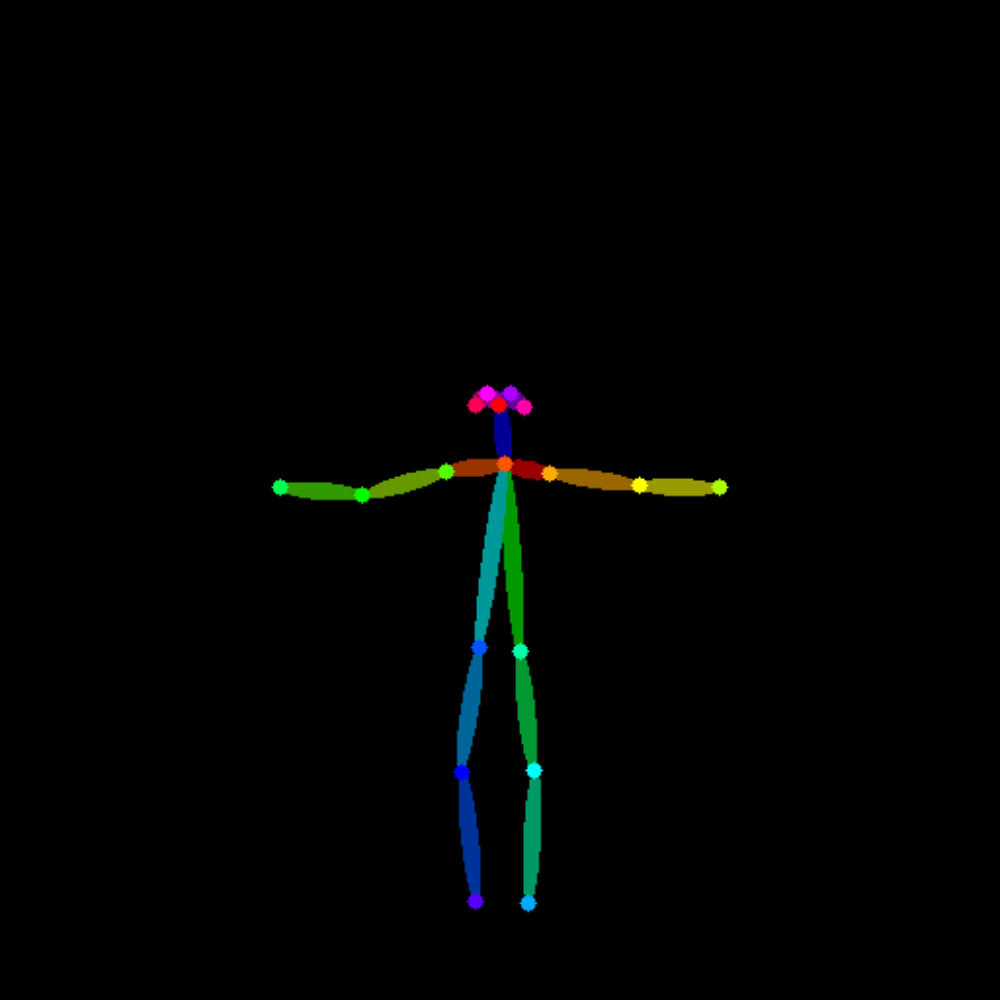

In [238]:
from PIL import Image
import cv2
openpose_joints_np = openpose_joints.detach().cpu().numpy()
print(openpose_joints_np.shape)
openpose_joints_np = project(openpose_joints_np)
openpose_joints_np/=1000
print(openpose_joints_np)
canvas = draw_poses(openpose_joints_np, 512,512,draw_body=True, draw_hand=False, draw_face=False)

canvas_img = cv2.resize(canvas, (1000,1000), interpolation=cv2.INTER_LINEAR)
canvas_img = Image.fromarray(canvas_img)
canvas_img

In [239]:

def render_pose(vertices):
    idx = [55, 12, 17, 19, 21, 16, 18, 20, 2, 5, 8, 1, 4, 7, 56, 57, 58, 59]
    openpose_joints = vertices[idx]
    openpose_joints_np = openpose_joints.detach().cpu().numpy()
    openpose_joints_np = project(openpose_joints_np)#render demo hard code 
    openpose_joints_np/=1000 #TO 0-1
    H,W = 512,512
    canvas = draw_poses(openpose_joints_np, H,W,draw_body=True, draw_hand=False, draw_face=False)
    canvas_img = cv2.resize(canvas, (1000,1000), interpolation=cv2.INTER_LINEAR)
    return canvas_img
    


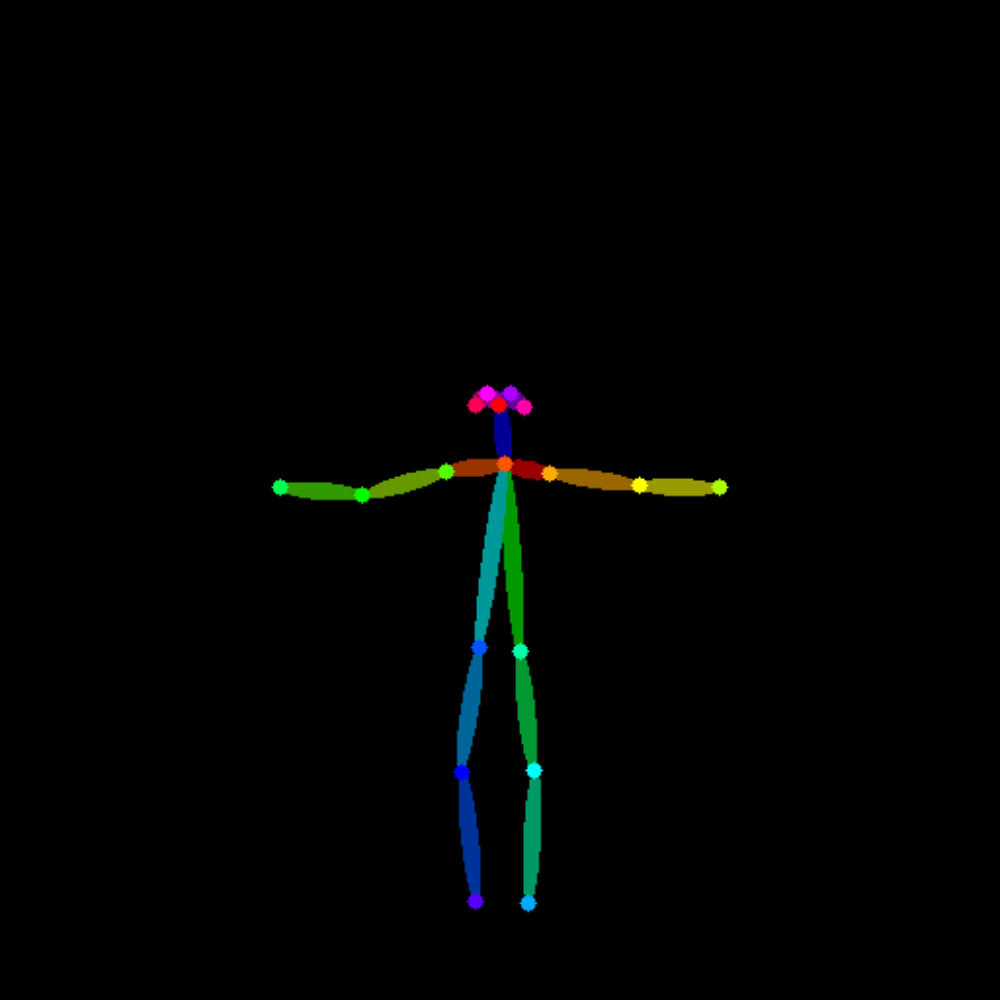

In [241]:
img =render_pose(smpl_mesh.joints.squeeze())
img = Image.fromarray(img)
img